In [1]:

##Using a pre-trained model InceptionV3 in Keras to extract the feature of a given image

from keras.preprocessing import image
from keras.applications.densenet import DenseNet121
from keras.applications.densenet import preprocess_input
import numpy as np

model = DenseNet121(weights='imagenet', pooling = 'avg', include_top=True)
model.summary()
import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.
















33193984/33188688 [==============================] - 2s 0us/step
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
______________________________

In [2]:
import pandas as pd
import random
import csv
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
import matplotlib.gridspec as gridspec

from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import datasets
from sklearn import preprocessing
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA
from sklearn import preprocessing

In [3]:
[ (i, model.layers[i].name, model.layers[i].output_shape[-1]) for i in range(len(model.layers))]

[(0, 'input_1', 3),
 (1, 'zero_padding2d_1', 3),
 (2, 'conv1/conv', 64),
 (3, 'conv1/bn', 64),
 (4, 'conv1/relu', 64),
 (5, 'zero_padding2d_2', 64),
 (6, 'pool1', 64),
 (7, 'conv2_block1_0_bn', 64),
 (8, 'conv2_block1_0_relu', 64),
 (9, 'conv2_block1_1_conv', 128),
 (10, 'conv2_block1_1_bn', 128),
 (11, 'conv2_block1_1_relu', 128),
 (12, 'conv2_block1_2_conv', 32),
 (13, 'conv2_block1_concat', 96),
 (14, 'conv2_block2_0_bn', 96),
 (15, 'conv2_block2_0_relu', 96),
 (16, 'conv2_block2_1_conv', 128),
 (17, 'conv2_block2_1_bn', 128),
 (18, 'conv2_block2_1_relu', 128),
 (19, 'conv2_block2_2_conv', 32),
 (20, 'conv2_block2_concat', 128),
 (21, 'conv2_block3_0_bn', 128),
 (22, 'conv2_block3_0_relu', 128),
 (23, 'conv2_block3_1_conv', 128),
 (24, 'conv2_block3_1_bn', 128),
 (25, 'conv2_block3_1_relu', 128),
 (26, 'conv2_block3_2_conv', 32),
 (27, 'conv2_block3_concat', 160),
 (28, 'conv2_block4_0_bn', 160),
 (29, 'conv2_block4_0_relu', 160),
 (30, 'conv2_block4_1_conv', 128),
 (31, 'conv2_bloc

In [4]:
from keras import Model
model1 = Model(inputs=model.inputs, outputs=model.layers[424].output)

In [5]:
%pwd

'/home/ec2-user/SageMaker'

In [6]:
import os
import pandas as pd
INV3_feature_dic = {}
INV3_feature_list=[]
directory = '/home/ec2-user/SageMaker/fashionbeans/maskeditems'
counter=0
onlyfiles = len(next(os.walk(directory))[2])

for filename in os.listdir(directory):
  try:
    if filename in INV3_feature_dic.keys():
      print('x')
    else:
      print(filename)
    
      img = image.load_img('/home/ec2-user/SageMaker/fashionbeans/maskeditems/'+str(filename), target_size=(224, 224))
      img_data = image.img_to_array(img)
      img_data = np.expand_dims(img_data, axis=0)
      img_data = preprocess_input(img_data)
      INV3_feature = model1.predict(img_data)
      INV3_feature_np = np.array(INV3_feature)
      INV3_feature_list.append(INV3_feature_np.flatten())
    
      key=str(filename)

      INV3_feature_dic[key]=INV3_feature_np
    

      #os.rename(directory+'/'+str(filename),directory+'/'+str(filename)+'-ex')
  
      counter+=1

      print(str(counter)+'of'+str(onlyfiles))
  except:
    pass

INV3_feature_list_np = np.array(INV3_feature_list)

52+8-masked-6.jpg
1of9574
32+10-masked-11.jpg
2of9574
66+29-masked-8.jpg
3of9574
27+16-masked-4.jpg
4of9574
72+26-masked-4.jpg
5of9574
8+21-masked-11.jpg
6of9574
0+27-masked-3.jpg
7of9574
41+2-masked-0.jpg
8of9574
49+15-masked-8.jpg
9of9574
16+15-masked-1.jpg
10of9574
40+25-masked-3.jpg
11of9574
43+4-masked-4.jpg
12of9574
6+29-masked-3.jpg
13of9574
32+3-masked-1.jpg
14of9574
29+3-masked-11.jpg
15of9574
53+21-masked-4.jpg
16of9574
72+19-masked-7.jpg
17of9574
17+12-masked-7.jpg
18of9574
34+23-masked-7.jpg
19of9574
7+18-masked-4.jpg
20of9574
71+16-masked-4.jpg
21of9574
66+1-masked-3.jpg
22of9574
50+6-masked-7.jpg
23of9574
46+30-masked-7.jpg
24of9574
6+9-masked-3.jpg
25of9574
60+27-masked-0.jpg
13+24-masked-4.jpg
26of9574
20+22-masked-7.jpg
27of9574
19+9-masked-7.jpg
28of9574
4+15-masked-3.jpg
29of9574
50+5-masked-8.jpg
30of9574
43+16-masked-3.jpg
31of9574
15+24-masked-4.jpg
32of9574
8+17-masked-8.jpg
33of9574
18+19-masked-4.jpg
34of9574
64+25-masked-2.jpg
35of9574
67+19-masked-3.jpg
36of9

In [7]:

len(INV3_feature_list)


9552

In [8]:
len(INV3_feature_dic.keys())

9552

In [ ]:
dn_features=pd.DataFrame(INV3_feature_list)
dn_features

In [159]:
dn_features['names']=list(INV3_feature_dic.keys())
dn_features.set_index('names', drop=True, append=False, inplace=True)
dn_features.head()

,0,1,2,3,4,5,6,7,8,9,...,6264,6265,6266,6267,6268,6269,6270,6271,labels,label names
names,,,,,,,,,,,,,,,,,,,,,
52+8-masked-6.jpg,-0.174113,1.302382,0.739442,0.661988,-0.717616,0.197712,1.145139,-0.388515,0.546552,-0.112082,...,-0.521628,-0.480063,-0.582739,0.457675,-0.805735,-0.411138,0.507768,-0.359012,6,sunglasses
32+10-masked-11.jpg,0.207674,1.205854,0.984380,0.609689,-0.583347,0.520938,1.082709,-0.674359,0.835891,0.110636,...,-0.487500,-0.465315,-0.562000,0.512028,-0.795515,-0.413199,0.613972,-0.358941,11,headwear
66+29-masked-8.jpg,1.567145,-0.186237,0.969132,-0.074707,1.244366,0.096070,-0.943365,-0.137104,0.023253,1.399339,...,-0.307409,-0.310132,-0.615838,-1.636990,-0.814323,-0.097262,-0.941905,-0.439168,8,top
27+16-masked-4.jpg,1.157446,0.421917,1.905508,0.416589,0.616664,0.224898,-0.916906,-0.605427,-0.077843,1.382010,...,-0.173303,-0.268863,-0.599134,-1.567516,-0.642764,-0.083700,-0.902006,-0.362542,4,outer
72+26-masked-4.jpg,1.577672,-0.087967,1.474612,-0.157816,1.149329,0.391099,-0.318556,-0.306075,-0.100767,1.401589,...,0.287064,0.299085,-0.468296,-1.214894,-0.319713,0.000934,-0.225988,-0.279379,4,outer


In [160]:
dn_features.to_csv('dn_features.csv')

In [161]:
dn_features = pd.read_csv('dn_features.csv', index_col='names')
dn_features.head()


,0,1,2,3,4,5,6,7,8,9,...,6264,6265,6266,6267,6268,6269,6270,6271,labels,label names
names,,,,,,,,,,,,,,,,,,,,,
52+8-masked-6.jpg,-0.174113,1.302382,0.739442,0.661988,-0.717616,0.197712,1.145139,-0.388515,0.546552,-0.112082,...,-0.521628,-0.480063,-0.582739,0.457675,-0.805735,-0.411138,0.507768,-0.359012,6,sunglasses
32+10-masked-11.jpg,0.207674,1.205854,0.984380,0.609689,-0.583347,0.520938,1.082709,-0.674359,0.835891,0.110636,...,-0.487500,-0.465315,-0.562000,0.512028,-0.795515,-0.413199,0.613972,-0.358941,11,headwear
66+29-masked-8.jpg,1.567145,-0.186237,0.969132,-0.074707,1.244366,0.096070,-0.943365,-0.137104,0.023253,1.399339,...,-0.307409,-0.310132,-0.615838,-1.636990,-0.814323,-0.097262,-0.941905,-0.439168,8,top
27+16-masked-4.jpg,1.157446,0.421917,1.905508,0.416589,0.616664,0.224898,-0.916906,-0.605427,-0.077843,1.382010,...,-0.173303,-0.268863,-0.599134,-1.567516,-0.642764,-0.083700,-0.902006,-0.362542,4,outer
72+26-masked-4.jpg,1.577672,-0.087967,1.474612,-0.157816,1.149329,0.391099,-0.318556,-0.306075,-0.100767,1.401589,...,0.287064,0.299085,-0.468296,-1.214894,-0.319713,0.000934,-0.225988,-0.279379,4,outer


In [162]:
### Cosine similarity between the in-set features 

scaler = preprocessing.StandardScaler()
dn_features.loc[:,'0':'6271'] = scaler.fit_transform(dn_features.loc[:,'0':'6271'])

In [163]:
sample_df = dn_features.loc[dn_features['labels'] == 7]
print(sample_df.shape)
sample_df.head()
sample_df.sort_index()

(2204, 6274)


,0,1,2,3,4,5,6,7,8,9,...,6264,6265,6266,6267,6268,6269,6270,6271,labels,label names
names,,,,,,,,,,,,,,,,,,,,,
0+1-masked-7.jpg,-0.468624,-0.707284,-1.456943,0.050219,-0.837750,-1.150050,-0.873636,-0.178506,0.122487,-0.789724,...,1.248834,0.804201,0.125143,0.265487,0.472126,-0.462271,-1.182438,0.119089,7,pants
0+10-masked-7.jpg,-0.729834,-0.277426,-1.008301,0.069469,-0.855445,-0.859819,-0.532718,-0.228921,0.233357,-0.929690,...,1.131123,0.948437,-0.163247,0.634583,0.265524,-0.465254,-1.002067,-0.074417,7,pants
0+12-masked-7.jpg,-0.769775,-0.388758,-1.382556,0.104476,-0.854603,-1.004818,-0.605259,-0.223593,0.196050,-0.990721,...,1.195115,0.913387,-0.340847,0.753699,0.444910,-0.488967,-0.189728,-0.360030,7,pants
0+13-masked-7.jpg,-0.422950,-0.704406,-1.397233,0.011262,-0.895688,-1.140819,-0.901800,-0.115676,0.134215,-0.759580,...,1.171100,0.865150,-0.051357,0.674317,0.288201,-0.481868,-0.044795,-0.091568,7,pants
0+14-masked-7.jpg,-0.793756,-0.126602,-1.030152,0.131463,-0.779956,-0.787096,-0.347151,-0.331093,0.158548,-1.036943,...,0.938952,0.845834,-0.102729,0.606576,0.309648,-0.429947,-0.841871,-0.427432,7,pants
0+15-masked-7.jpg,-0.575493,-0.580584,-1.409819,-0.001886,-0.958991,-1.088427,-1.048585,-0.202675,0.144809,-0.870884,...,1.985411,1.727201,-0.183792,1.625003,0.197474,-0.518773,3.997861,-0.181214,7,pants
0+16-masked-7.jpg,-0.346662,-0.790803,-1.604678,-0.012360,-0.675541,-1.093235,-1.090185,-0.064475,0.029948,-0.699593,...,0.911379,0.607342,-0.123915,0.369521,0.099259,-0.269450,0.265007,-0.248913,7,pants
0+17-masked-7.jpg,-0.537032,-0.657247,-1.362471,0.000286,-0.863787,-1.077227,-1.071454,-0.065788,0.100524,-0.869635,...,1.362094,1.333158,0.002083,1.012777,0.484201,-0.322068,0.225866,-0.222460,7,pants
0+18-masked-7.jpg,-0.644406,-0.427518,-1.177867,0.052380,-0.802672,-0.910920,-0.648758,-0.138720,0.137579,-0.812005,...,1.158675,1.099007,-0.114711,0.740727,0.457386,-0.460038,0.084851,-0.239995,7,pants


In [164]:
cos_val = sample_df.iloc[:, :6271].dot(sample_df.iloc[:, :6271].T)
cos_val.head()

names,72+19-masked-7.jpg,17+12-masked-7.jpg,34+23-masked-7.jpg,50+6-masked-7.jpg,46+30-masked-7.jpg,20+22-masked-7.jpg,19+9-masked-7.jpg,11+27-masked-7.jpg,72+13-masked-7.jpg,69+19-masked-7.jpg,...,52+21-masked-7.jpg,71+24-masked-7.jpg,53+4-masked-7.jpg,34+22-masked-7.jpg,62+27-masked-7.jpg,13+5-masked-7.jpg,61+7-masked-7.jpg,44+7-masked-7.jpg,69+5-masked-7.jpg,62+30-masked-7.jpg
names,,,,,,,,,,,,,,,,,,,,,
72+19-masked-7.jpg,5531.853799,1805.691876,2907.676741,3051.170771,2113.286222,3938.531772,1857.613442,2303.384848,3999.309616,3600.128931,...,3220.256691,2346.678754,3091.611355,3044.023279,3260.110395,3495.489537,2189.230302,3143.338161,1797.720385,2952.790136
17+12-masked-7.jpg,1805.691876,5068.846072,2498.576322,1327.682510,2445.669970,1901.084681,1918.970445,2380.235056,1696.239129,2409.356813,...,3031.471635,3048.053806,1461.599489,2389.756375,1751.642862,1708.005657,1943.045552,2640.600471,974.332513,1940.762734
34+23-masked-7.jpg,2907.676741,2498.576322,6176.987788,1530.463263,2004.911199,2513.710185,2323.605976,2197.997138,3012.066746,2736.325445,...,2474.060982,2605.368308,1934.190477,2593.490930,2515.050917,2295.088237,1926.436613,2070.723656,495.373429,2343.693765
50+6-masked-7.jpg,3051.170771,1327.682510,1530.463263,6592.455543,2033.184158,3111.594027,1647.008783,2019.946558,2801.642808,2966.781952,...,2534.456743,1187.334056,3326.406608,2868.869991,3575.199579,3002.787416,2855.118631,2654.132109,2369.847730,1913.887496
46+30-masked-7.jpg,2113.286222,2445.669970,2004.911199,2033.184158,4480.048338,2255.412255,1593.949400,2413.541105,2018.214129,2593.603767,...,2548.612833,2754.908752,2425.282908,1986.925491,2301.092903,2321.158732,2616.763564,2663.709779,1353.539658,1940.937754


46+10-masked-7.jpg


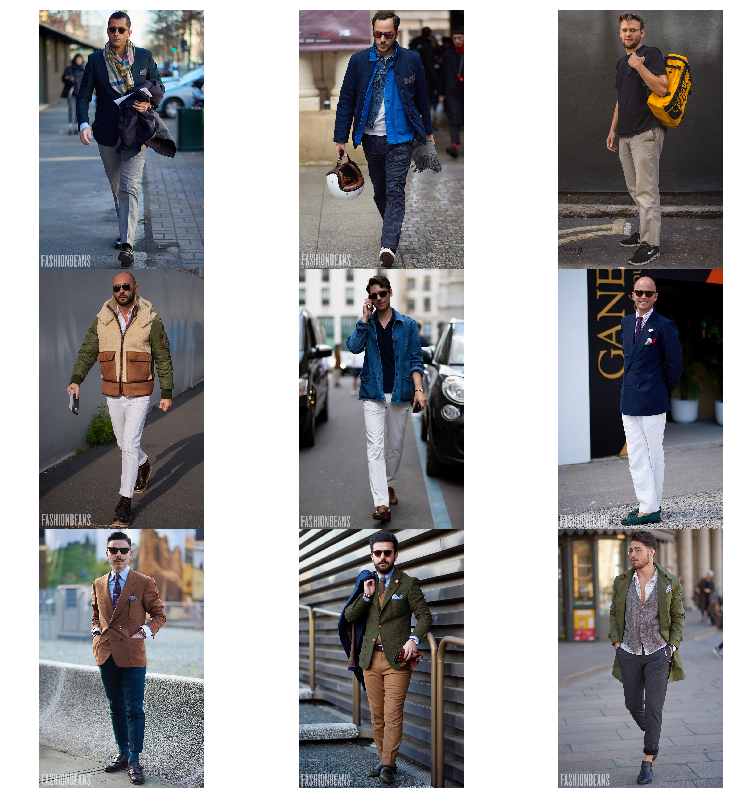

In [165]:
### Plotting the top n matches of the each item within it's row of cosine values

#n=number of items to test
n=1
#m=number of matches to present
m=9
for i in range(n):
    #r=random.randrange(0,cos_val.shape[1])
    r = 100
    print(list(cos_val.index.values)[r])
    cos_val_sort = cos_val.iloc[r,:].sort_values(ascending = False)
    
    fig5 = plt.figure(constrained_layout=True,figsize=(16, 16))
    spec5 = gridspec.GridSpec(ncols=3, nrows=1+m//3)
    spec5.update(wspace=0.0, hspace=0.0, top=0.95, bottom=0.05, left=0.17, right=0.845) 
    counter=1
    for row in range(1+m//3):
        for col in range(3):
            if counter < 1+m:
                ax = fig5.add_subplot(spec5[row, col])
                ax.imshow(mpimg.imread('/home/ec2-user/SageMaker/fashionbeans/processedimages/'+str(cos_val_sort.index[counter - 1]).split('-')[0]+'.jpg'))
                ax.axis('off')
                counter+=1
